### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

In [2]:
df = pd.read_csv('AbandonoEmpleados.csv', sep=';', index_col= 'id', na_values='#N/D')
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


In [3]:
df.shape

(1470, 31)

In [4]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

## Business Analytics

### Null Data Analytics

In [5]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [7]:
missing_values = df.isna().sum().sort_values(ascending=False).to_frame()
missing_values = missing_values.rename(columns={0: 'Empty Cells'})
missing_values['Percentage %'] = round(missing_values['Empty Cells']/df.shape[0],2)*100
missing_values

,Empty Cells,Percentage %
anos_en_puesto,1238,84.0
conciliacion,1011,69.0
sexo,199,14.0
educacion,101,7.0
satisfaccion_trabajo,76,5.0
...,...,...
carrera,0,0.0
distancia_casa,0,0.0
departamento,0,0.0
viajes,0,0.0


Conclusions:
<ul>
    <li> anos_en_puesto and conciliacion have too many null values -> Delete variables </li>
    <li> sexo, educacion, satisfaccion_trabajo and implicacion have few null data -> impute variables after EDA </li>
</ul>

In [8]:
df.drop(columns=['anos_en_puesto', 'conciliacion'], inplace=True)
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,mayor_edad,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,Alta,2,Sales Executive,Alta,Single,5993,8,Y,Yes,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,Media,2,Research Scientist,Media,Married,5130,1,Y,No,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,Media,1,Laboratory Technician,Media,Single,2090,6,Y,Yes,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,Alta,1,Research Scientist,Alta,Married,2909,1,Y,Yes,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,Alta,1,Laboratory Technician,Alta,Married,3468,9,Y,No,12,Alta,Muy_Alta,80,1,6,3,2,2,2


### EDA (Exploratory Data Analysis) categorical variables

In [9]:
def EDA_categorical_graphics(cat):
    rows = ceil(cat.shape[1] / 2)
    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(14, rows*4))

    ax = ax.flat
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[each])
        ax[each].set_title(variable, fontsize=12, fontweight='bold')
        ax[each].tick_params(labelsize=12)
        plt.tight_layout()


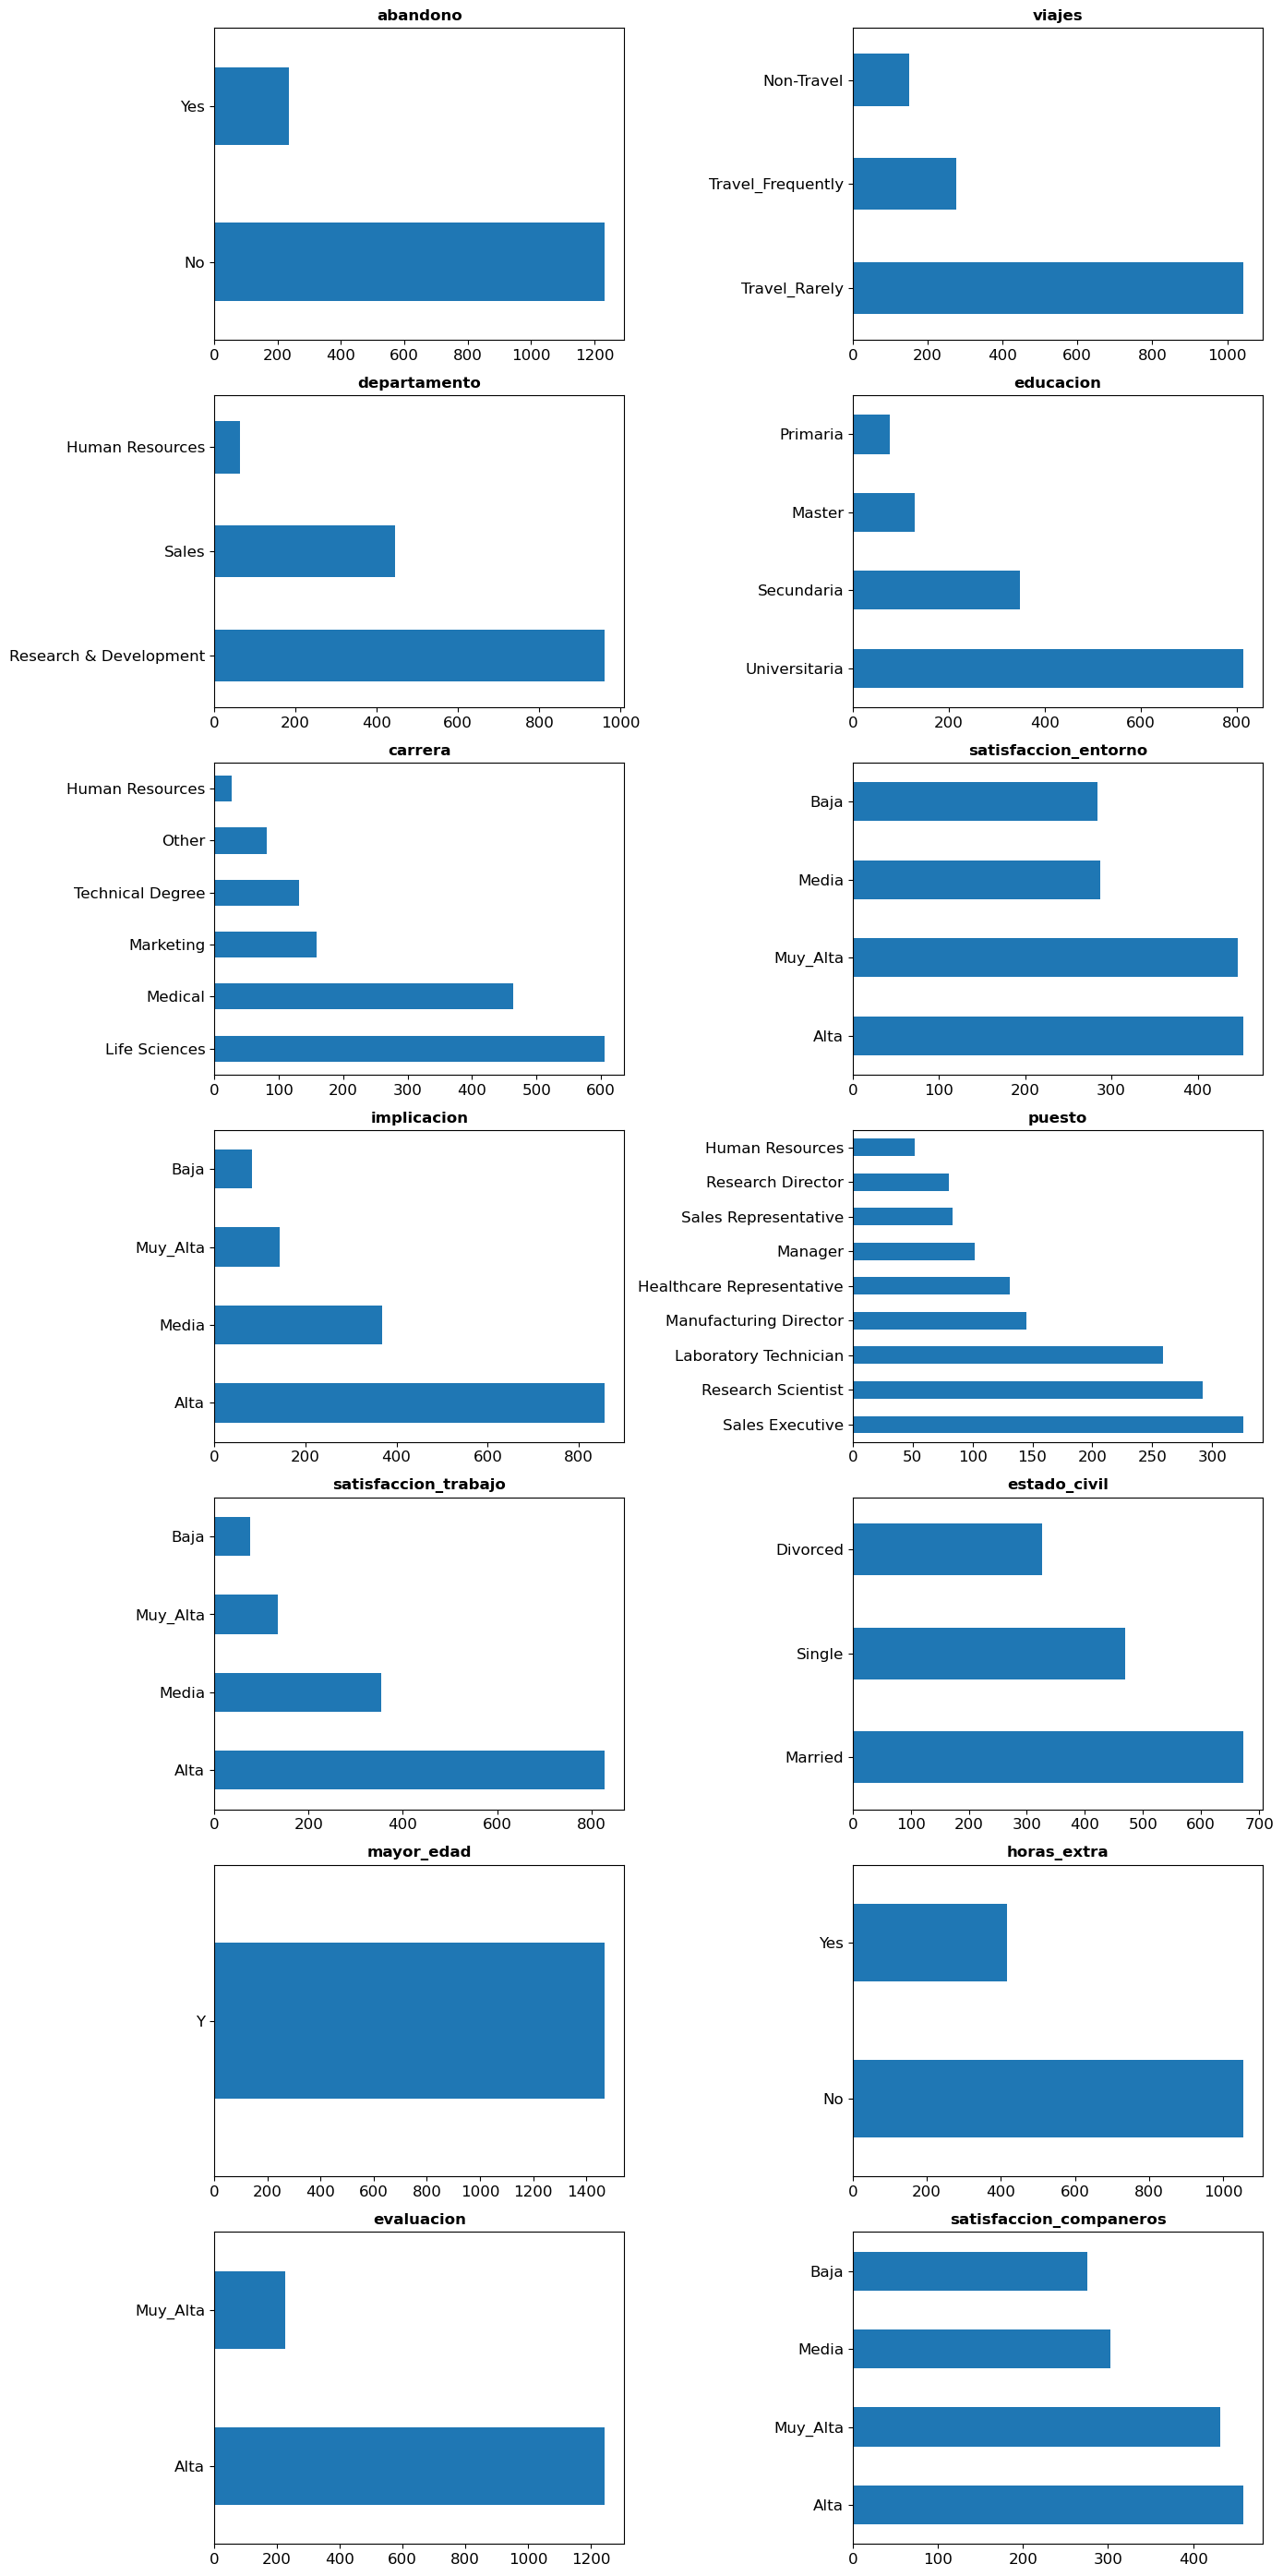

In [10]:
EDA_categorical_graphics(df.select_dtypes('O'))

Conclusions:
<ul>
    <li> Variable 'mayor_edad' only has one value -> Delete variable </li>
    <li> Imputations about categorical variables :</li>
    <ul>
        <li> educacion: impute by 'Universitaria' is the most common </li>
        <li> satisfaccion_trabajo: impute by 'Alta' is the most common </li>
        <li> implicacion: impute by imputar por "Alta" </li>
    </ul>
</ul>

In [11]:
df.drop(columns='mayor_edad', inplace=True)
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

In [12]:
missing_values = df.isna().sum().sort_values(ascending=False).to_frame()
missing_values = missing_values.rename(columns={0: 'Empty Cells'})
missing_values

,Empty Cells
sexo,199
edad,0
salario_mes,0
anos_desde_ult_promocion,0
anos_compania,0
...,...
educacion,0
distancia_casa,0
departamento,0
viajes,0


### EDA (Exploratory Data Analysis) numerical variables

In [13]:
def statistics_count(num):
    statistics = num.describe().T
    statistics['median'] = num.median()
    statistics = statistics.iloc[:, [0,1,8,2,3,4,5,6,7]]
    return(statistics)

In [14]:
statistics_count(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [15]:
df['sexo'].value_counts()

3.0    739
2.0    328
4.0    130
1.0     74
Name: sexo, dtype: int64

Conclusions:
<ul>
    <li> variable 'empleados' has just one value -> Delete this variable </li>
    <li> variable 'sexo' has four values -> Delete this variable </li>
    <li> variable 'horas_quincena' has only one value -> Delete this variable </li>
</ul>
Null data pending at the moment, I only have the 'sexo' variable, and I'm going to
delete this variable, so it's not necessary to impute anything.

In [16]:
df.drop(columns=['empleados', 'sexo', 'horas_quincena'], inplace=True)

In [17]:
missing_values = df.isna().sum().sort_values(ascending=False).to_frame()
missing_values = missing_values.rename(columns={0: 'Empty Cells'})
missing_values.sum()

Empty Cells    0
dtype: int64

In [18]:
df.shape

(1470, 25)

### Insights generation

#### Quantification of the problem: What is the dropout rate?

In [19]:
df['abandono'].value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

#### Is there a typical profile of an employee who leaves the company?

In [20]:
df['abandono'] = df['abandono'].map({'No':0, 'Yes':1}) #This is so that the average can be plotted on the following graphs

In [21]:
cat = df.select_dtypes('O').columns.values

In [22]:
cat

array(['viajes', 'departamento', 'educacion', 'carrera',
       'satisfaccion_entorno', 'implicacion', 'puesto',
       'satisfaccion_trabajo', 'estado_civil', 'horas_extra',
       'evaluacion', 'satisfaccion_companeros'], dtype=object)

In [23]:
num = df.select_dtypes('number').columns.values.tolist()

In [24]:
num.remove('abandono')
num.remove('salario_mes')

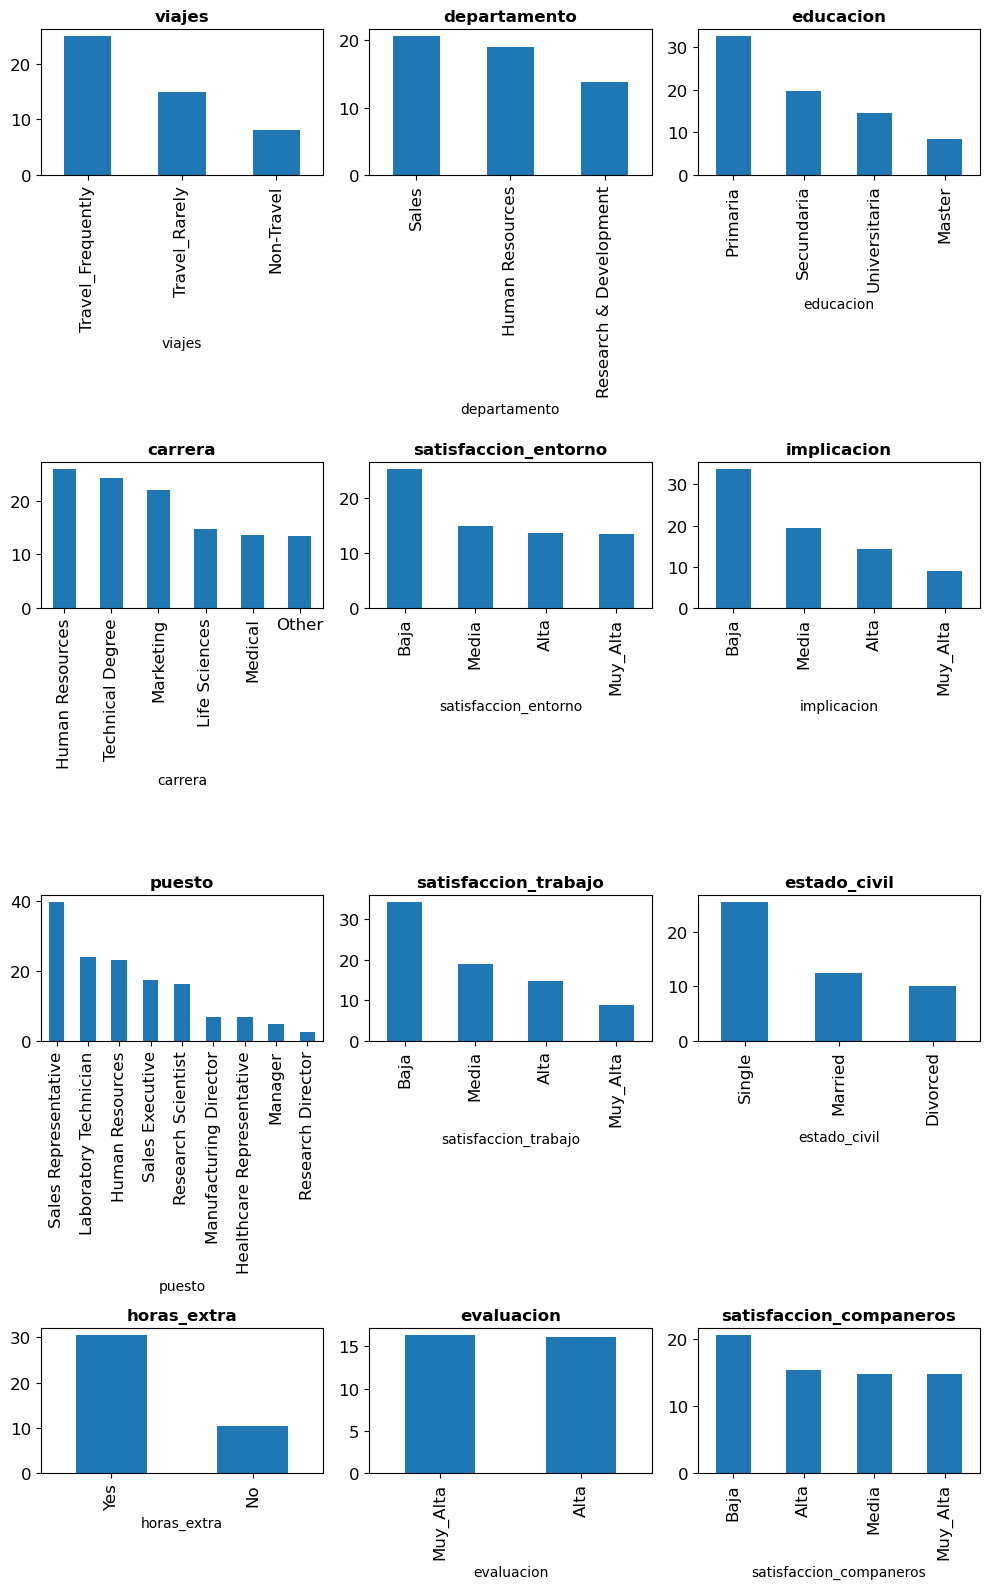

In [25]:
rows = ceil(len(cat)/3)
f, ax = plt.subplots(nrows=rows, ncols=3, figsize=(10, rows*4))

ax = ax.flat
for each, variable in enumerate(cat):
    temp = df.groupby(variable)['abandono'].mean().sort_values(ascending=False)*100
    temp.plot.bar(ax=ax[each])
    ax[each].set_title(variable, fontsize=12, fontweight='bold')
    ax[each].tick_params(labelsize=12)
    plt.tight_layout()


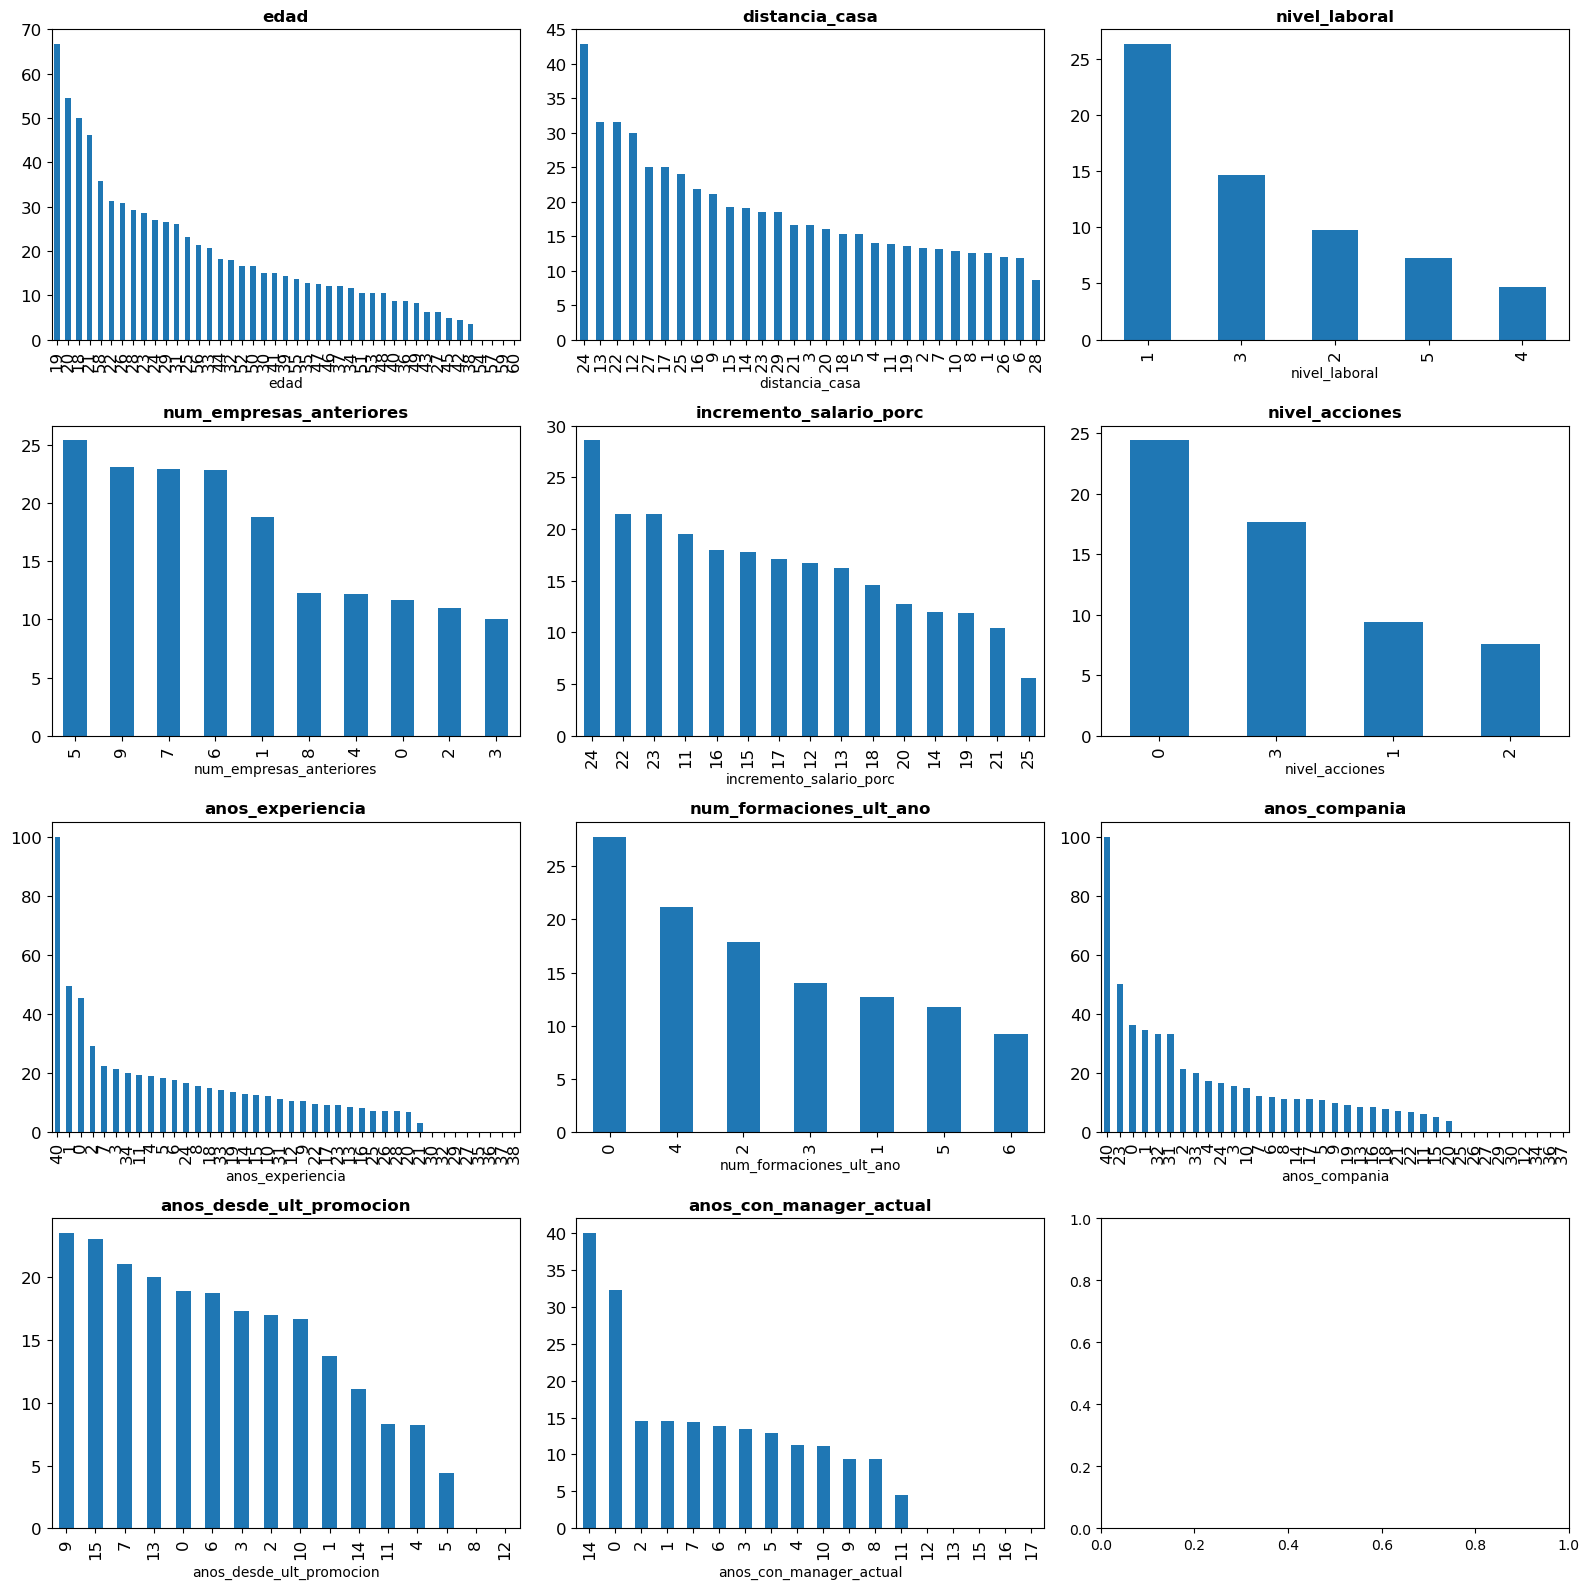

In [26]:
rows = ceil(len(num)/3)
f, ax = plt.subplots(nrows=rows, ncols=3, figsize=(16, rows*4))

ax = ax.flat
for each, variable in enumerate(num):
    temp = df.groupby(variable)['abandono'].mean().sort_values(ascending=False)*100
    temp.plot.bar(ax=ax[each])
    ax[each].set_title(variable, fontsize=12, fontweight='bold')
    ax[each].tick_params(labelsize=12)
    plt.tight_layout()


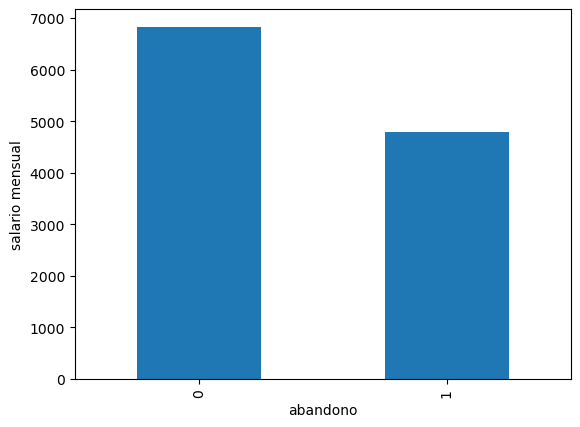

In [27]:
temp = df.groupby('abandono')['salario_mes'].mean()
ax=temp.plot.bar()
ax.set_ylabel('salario mensual');

Conclusions:
The average profile of the employee leaving the company is:
<ul>
    <li> Low educational level </li>
    <li> Single </li>
    <li> Work in sales </li>
    <li> Low salary </li>
    <li> High overtime load </li>
    <li> Travel frequently </li>
    <li> Dissatisfied with the environment </li>
    <li> Has the lowest level of actions and the lowest employment level </li>
    <li> Dissatisfied with the work </li>
    <li> His position is sales representative </li>
 </ul>

#### What is the economic impact of this problem?

According to the "Cost of Turnover" study by the Center for American Progress:
<ul>
    <li> The cost of employees earning less than 30,000 to leave the company is 16.1% of their salary. </li>
    <li> The cost of employees earning between 30,000 - 50,000 to leave the company is 19.7% of their salary. </li>
    <li> The cost of employees earning between 50,000 - 75,000 to leave the company is 20.4% of their salary. </li>
    <li> The cost of employees earning more than 75,000 to leave the company is 21% of their salary. </li>
</ul>

Creation of new variables


In [28]:
df['salario_ano'] = df['salario_mes'].transform(lambda x: x*12)
df[['salario_mes', 'salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [29]:
df.index.nunique() #number of employees of the company

1470

In [30]:
#Calculation of the economic impact of each employee if he/she leaves the company
conditions = [(df['salario_ano'] <= 30000),
              (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
              (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
              (df['salario_ano'] > 75000)]
results = [df['salario_ano']*0.161, df['salario_ano']*0.197, df['salario_ano']*0.204, df['salario_ano']*0.21]

df['impacto_abandono'] = np.select(conditions, results, default=-999)
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,Research Scientist,Alta,Married,2909,1,Yes,11,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Married,3468,9,No,12,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


#### How much has this problem cost us in the last year?

In [31]:
total_cost = df.loc[df['abandono'] == 1]['impacto_abandono'].sum()
total_cost

2719005.912

This problem has cost about 2,720,000 euros

#### How much does it cost us if employees are not motivated? (loss of 'implicacion' variable = low)

In [32]:
df.loc[(df['abandono'] == 1) & (df['implicacion'] == 'Baja')]['impacto_abandono'].sum()

368672.688

#### How much money could we save by improving employee loyalty?

In [33]:
print(f"Reducing employee retirement by 10% could save us {int(total_cost*0.1)}$ each year")
print(f"Reducing employee retirement by 20% could save us {int(total_cost*0.2)}$ each year")
print(f"Reducing employee retirement by 30% could save us {int(total_cost*0.3)}$ each year")

Reducing employee retirement by 10% could save us 271900$ each year
Reducing employee retirement by 20% could save us 543801$ each year
Reducing employee retirement by 30% could save us 815701$ each year


<b> And we can continue to map strategies associated with churn insights:</b>

We had seen that sales representativess are the position that leaves the most. Would it make sense to make a specific plan for them? What would be the cost saved if we decrease the leakage by 30%?

First let's calculate the % of sales representatives who have left in the past year.

In [34]:
total_sales_past = len(df.loc[df['puesto'] == 'Sales Representative'])
retirement_sales_past = len(df.loc[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 1)])
porc_past = retirement_sales_past / total_sales_past

porc_past*100

39.75903614457831

How many employees leave the company this year

In [35]:
leave_company_past_year = len(df.loc[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 1)])
print('Number of employees leave the company past year: {}'.format(leave_company_past_year))

Number of employees leave the company past year: 33


In [36]:
total_sales_actual = len(df.loc[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 0)])
leave_company = int(total_sales_actual * porc_past)
print('Number of employees probably leave the company this year: {}'.format(leave_company))

Number of employees probably leave the company this year: 19


What is the cost to the company of the 19 sales representatives predicted to leave this year?

In [37]:
df.loc[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 0),'impacto_abandono'].sum()*porc_past

124824.0808192771

Of these 19 sales representative, how many can be retained (hypothesis 30%) and how much money can be involved

In [38]:
retain = int(leave_company * 0.3)

save = df.loc[(df['puesto'] == 'Sales Representative') & (df['abandono'] == 0),'impacto_abandono'].sum()*porc_past*0.3

print(f'We can retain {retain} sales representatives and this would mean savings of {round(save,2)} $.')

We can retain 5 sales representatives and this would mean savings of 37447.22 $.


This data is also very interesting because it allows us to determine the budget for retention actions by department or profile.

We know that we can spend up to $37,000 just on specific actions to retain sales reps and they would be paying for themselves with the loss avoided.

## Machine Learning

In [39]:
df_ml = df.copy()

In [40]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### Preparation of the data for modeling

#### Transform all categorical and numerical variables

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes('O')
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop=True)

In [42]:
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,carrera_Human Resources,carrera_Life Sciences,carrera_Marketing,carrera_Medical,carrera_Other,carrera_Technical Degree,satisfaccion_entorno_Alta,satisfaccion_entorno_Baja,satisfaccion_entorno_Media,satisfaccion_entorno_Muy_Alta,implicacion_Alta,implicacion_Baja,implicacion_Media,implicacion_Muy_Alta,puesto_Healthcare Representative,puesto_Human Resources,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,satisfaccion_trabajo_Alta,satisfaccion_trabajo_Baja,satisfaccion_trabajo_Media,satisfaccion_trabajo_Muy_Alta,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Final Dataframe

Join numeric variables with categorical one hot encoding variables

In [43]:
num = df.select_dtypes('number').reset_index(drop=True)

In [44]:
num.head()

,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864
1,49,0,8,2,5130,1,23,1,10,3,10,1,7,61560,12558.240
2,37,1,2,1,2090,6,15,0,7,3,0,0,0,25080,4037.880
3,33,0,3,1,2909,1,11,0,8,3,8,3,0,34908,6876.876
4,27,0,2,1,3468,9,12,1,6,3,2,2,2,41616,8198.352


In [45]:
df_ml = pd.concat([cat_ohe, num], axis=1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,carrera_Human Resources,carrera_Life Sciences,carrera_Marketing,carrera_Medical,carrera_Other,carrera_Technical Degree,satisfaccion_entorno_Alta,satisfaccion_entorno_Baja,satisfaccion_entorno_Media,satisfaccion_entorno_Muy_Alta,implicacion_Alta,implicacion_Baja,implicacion_Media,implicacion_Muy_Alta,puesto_Healthcare Representative,puesto_Human Resources,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,satisfaccion_trabajo_Alta,satisfaccion_trabajo_Baja,satisfaccion_trabajo_Media,satisfaccion_trabajo_Muy_Alta,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49,0,8,2,5130,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,37,1,2,1,2090,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,33,0,3,1,2909,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,27,0,2,1,3468,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,36,0,23,2,2571,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,39,0,6,3,9991,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,27,0,4,2,6142,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49,0,2,2,5390,2,14,0,17,3,9,0,8,64680,13194.720


### Modeling Design

#### Separating targets and features

In [46]:
X = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Separating train and test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Training the model with training data - Decision tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

ac = DecisionTreeClassifier(max_depth=4)
ac.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Prediction and validation with testing data

In [52]:
#Prediction
y_pred = ac.predict_proba(X_test)[:, 1] #column 0: employees who do not leave the company, column 1: employees who leave the company
y_pred[:20]

array([0.05411255, 0.33333333, 0.05411255, 0.05411255, 0.05411255,
       0.33333333, 0.05411255, 0.11413043, 0.11413043, 0.05411255,
       1.        , 0.26785714, 0.05411255, 0.26785714, 0.05411255,
       0.11413043, 0.11413043, 0.05411255, 0.05411255, 0.33333333])

In [54]:
#Evaluation
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.6731390915119364

#### Training the model with training data - logistic regression classifier

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train)

LogisticRegression(penalty=None)

#### Prediction and validation with testing data

In [58]:
#Prediction
y_pred_lr = lr.predict_proba(X_test)[:, 1] #column 0: employees who do not leave the company, column 1: employees who leave the company
roc_auc_score(y_test, y_pred_lr)

0.6629641909814323

#### Training the model with training data - Random Forest classifier with GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
grid = {'n_estimators':[600,800,1000], 'criterion':['gini', 'entropy'], 'min_samples_leaf':[5,7,9,11], 'max_depth':[3,5,7]}
gs = GridSearchCV(rf, param_grid=grid, scoring='precision', cv=3, n_jobs=-1, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, oob_score=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 7, 9, 11],
                         'n_estimators': [600, 800, 1000]},
             return_train_score=True, scoring='precision')

In [61]:
best_model = gs.best_estimator_
best_model.oob_score_

0.8377065111758989

In [62]:
gs.best_score_

1.0

Ten variables most important of the model

In [73]:
feature_importances = pd.DataFrame([best_model.feature_importances_, X.columns.values])
feature_importances = feature_importances.T
feature_importances.rename(columns={0: 'Feature importance', 1: 'Feature'}, inplace=True)
feature_importances.sort_values(by='Feature importance', ascending=False).head(10)

,Feature importance,Feature
41,0.094762,horas_extra_Yes
51,0.092091,salario_mes
55,0.092048,anos_experiencia
60,0.089876,salario_ano
61,0.086245,impacto_abandono
40,0.086144,horas_extra_No
48,0.058214,edad
57,0.044172,anos_compania
59,0.041404,anos_con_manager_actual
50,0.038935,nivel_laboral


#### Prediction and validation with testing data

In [75]:
#Prediction
y_pred_rf = best_model.predict_proba(X_test)[:, 1] #column 0: employees who do not leave the company, column 1: employees who leave the company
#Evaluation
roc_auc_score(y_test, y_pred_rf)

0.7593667108753316

<b> Conclusions: </b>

With RandomForestClassifier improves the model by 76% vs 66% y 67% with DecisioTreeClassifier and LogisticRegression respectively

### Interpretation

#### Tree diagram of the model DecisionTreeClassifier

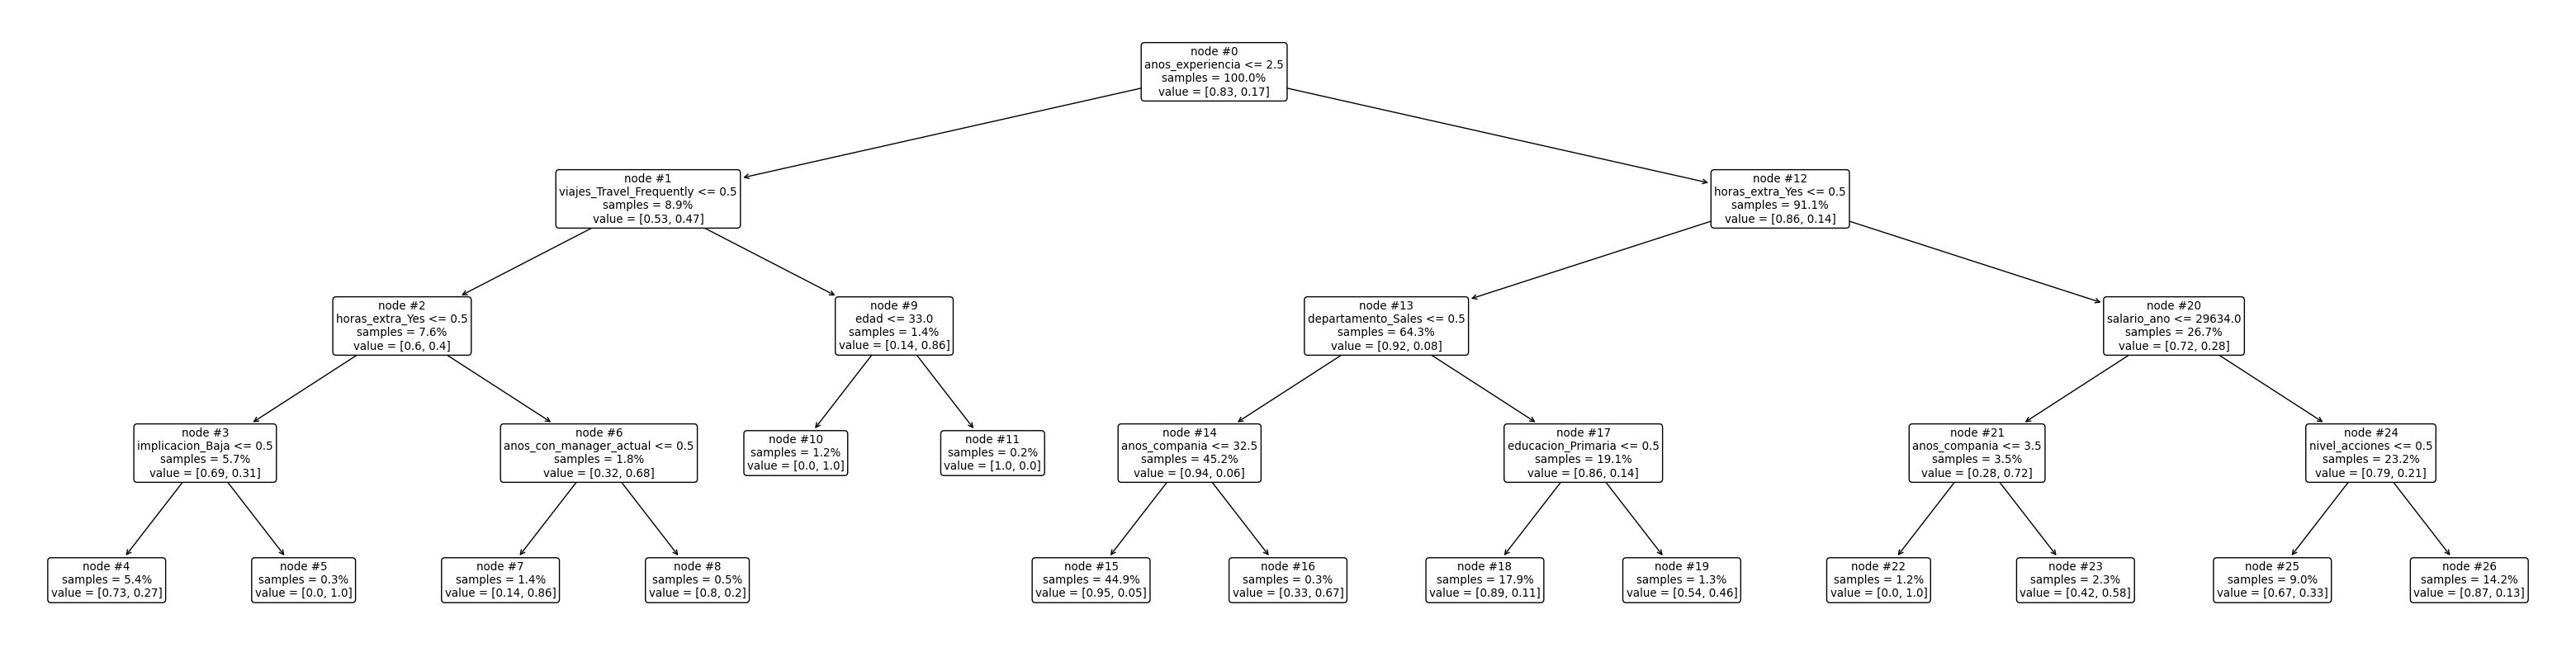

In [84]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,10))

plot_tree(ac,
          feature_names=X_test.columns,
          impurity=False,
          node_ids=True,
          proportion=True,
          rounded=True,
          precision=2)
plt.show()

#### Variables importances of the best model

<Axes: >

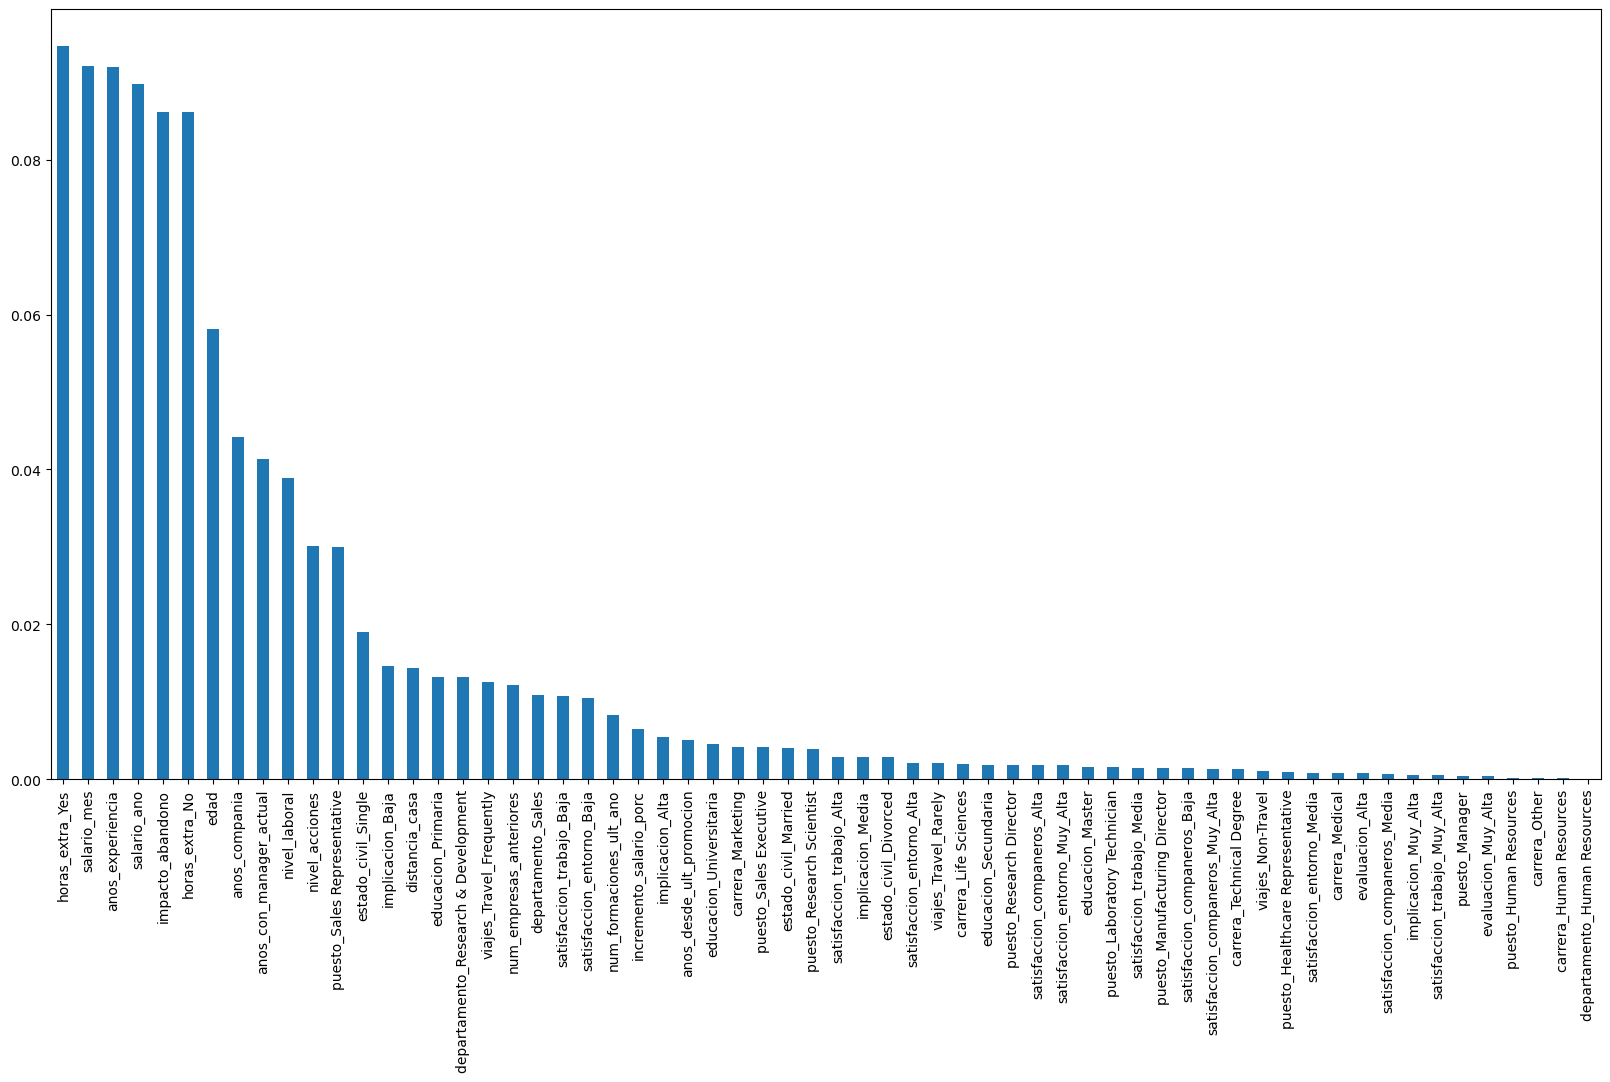

In [89]:
pd.Series(best_model.feature_importances_, index=X_test.columns).sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

#### Explotation

Incorporation of the score to final dataframe 

In [90]:
df['scoring_abandono'] = best_model.predict_proba(df_ml.drop(columns='abandono'))[:, 1]
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5,71916,14670.864,0.198518
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.078145
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0,25080,4037.880,0.436777
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,Research Scientist,Alta,Married,2909,1,Yes,11,Alta,Alta,0,8,3,8,3,0,34908,6876.876,0.253556
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Married,3468,9,No,12,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.129184


Example of the 10 employees most likely to leave the company:

In [92]:
df.sort_values(by='scoring_abandono', ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,Sales Representative,Baja,Single,1118,1,Yes,14,Alta,Muy_Alta,0,1,4,1,1,0,13416,2159.976,0.669399
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,Sales Representative,Media,Single,2121,1,Yes,13,Alta,Media,0,1,3,1,0,0,25452,4097.772,0.615397
1624,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,Media,Alta,1,Sales Representative,Alta,Single,1569,1,Yes,12,Alta,Alta,0,0,2,0,0,0,18828,3031.308,0.607182
614,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,Media,Alta,1,Sales Representative,Alta,Single,1878,1,Yes,14,Alta,Muy_Alta,0,0,3,0,0,0,22536,3628.296,0.605780
1248,19,1,Non-Travel,Research & Development,10,Secundaria,Medical,Baja,Media,1,Research Scientist,Media,Single,1859,1,Yes,25,Muy_Alta,Media,0,1,2,1,0,0,22308,3591.588,0.599010
167,19,1,Travel_Rarely,Sales,22,Universitaria,Marketing,Muy_Alta,Alta,1,Sales Representative,Alta,Single,1675,1,Yes,19,Alta,Muy_Alta,0,0,2,0,0,0,20100,3236.100,0.598582
622,26,1,Travel_Rarely,Research & Development,24,Primaria,Technical Degree,Alta,Baja,1,Laboratory Technician,Baja,Single,2340,1,Yes,18,Alta,Media,0,1,3,1,0,0,28080,4520.880,0.597143
952,25,1,Travel_Rarely,Sales,19,Secundaria,Marketing,Alta,Media,1,Sales Representative,Media,Married,2413,1,Yes,18,Alta,Alta,3,1,2,1,0,0,28956,4661.916,0.563847
1868,29,1,Travel_Frequently,Research & Development,24,Secundaria,Life Sciences,Muy_Alta,Media,1,Research Scientist,Media,Single,2439,1,Yes,24,Muy_Alta,Media,0,1,3,1,1,0,29268,4712.148,0.562194


Example of the risk of leave the company by workstation (puesto):

<Axes: title={'center': 'scoring_abandono'}, xlabel='puesto'>

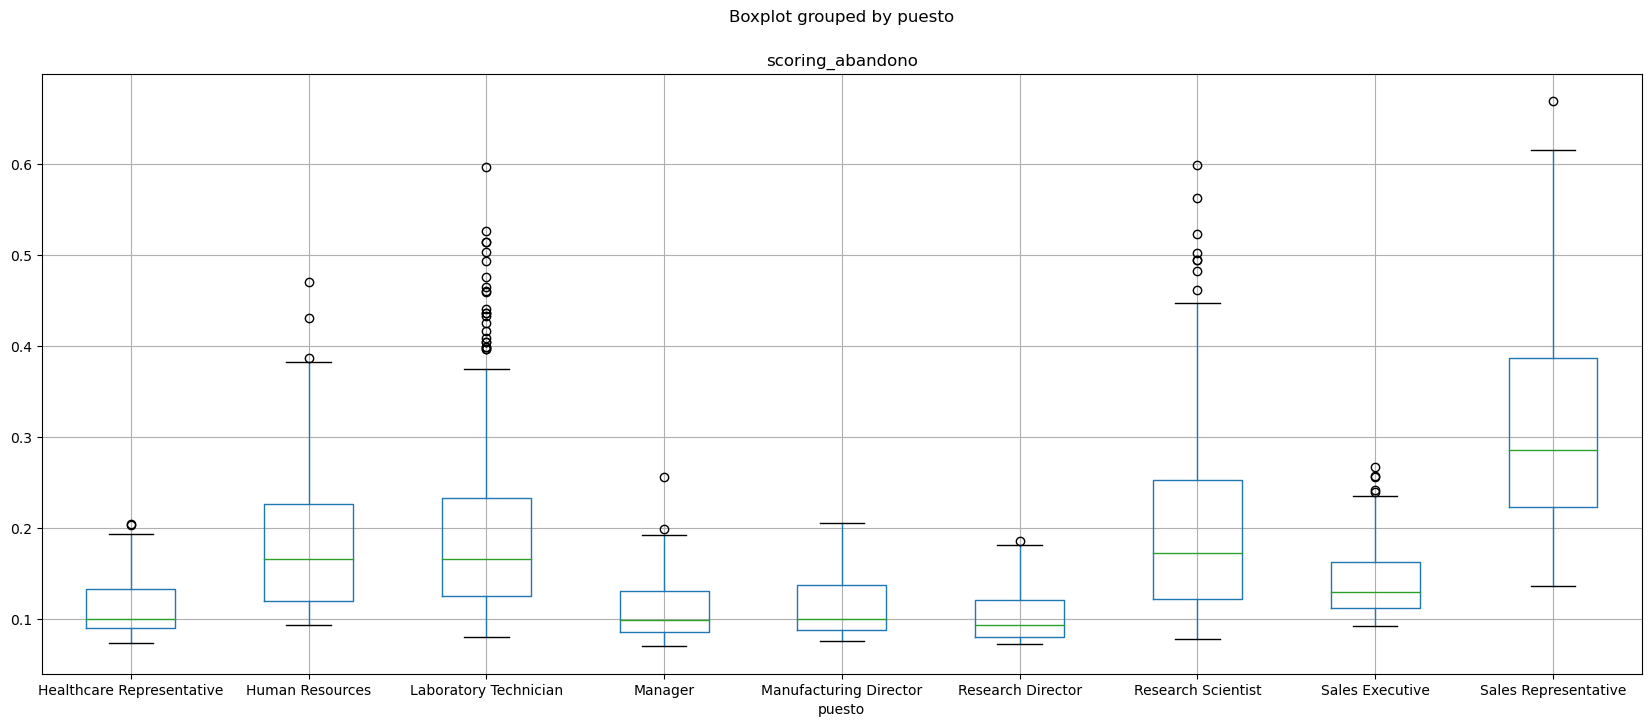

In [95]:
df.boxplot(column='scoring_abandono', by='puesto', figsize=(20,8))

#### Save results locally

In [96]:
df.to_excel('abandono_scoring.xlsx')

 
### <center><b><i> Thanks to Isaac González founder of datascience4business for sharing his knowledge and projects, I'm very greatful to you!! :)</i></b></center>
